<a href="https://colab.research.google.com/github/shahchayan9/EDA/blob/main/Tabular_diverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Analysis - Part 1: EDA and Preprocessing

In [ ]:
# Import necessary libraries and setup
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn autoviml

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
import pandas as pd

# Load the dataset using the exact path from kagglehub
df = pd.read_csv('/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv')
print(df.head())  # Display the first few rows to confirm it loaded correctly

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
   Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]


Executing Part A: Exploratory Data Analysis and Preprocessing

Part A.1: Initial Data Exploration

1. Dataset Overview:
Total number of transactions: 284807
Number of features: 31

2. Transaction Distribution:
Normal Transactions: 284315
Fraudulent Transactions: 492
Fraud Percentage: 0.17%

3. Missing Values Check:
No missing values found in the dataset

4. Transaction Amount Statistics:
          count   mean    std  min  25%   50%    75%      max
Class                                                        
0     284315.00  88.29 250.11 0.00 5.65 22.00  77.05 25691.16
1        492.00 122.21 256.68 0.00 1.00  9.25 105.89  2125.87

Part A.2: Data Visualization


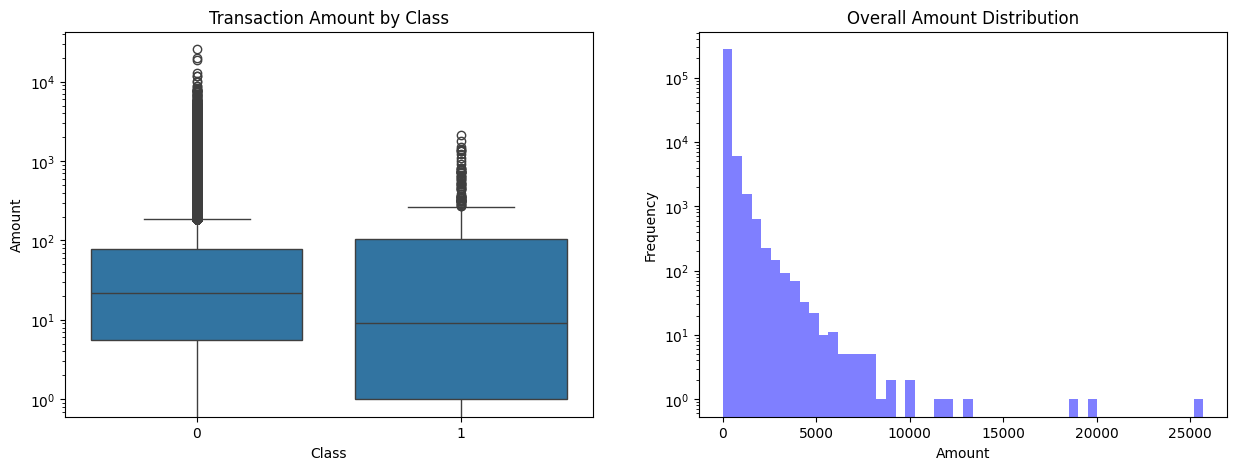

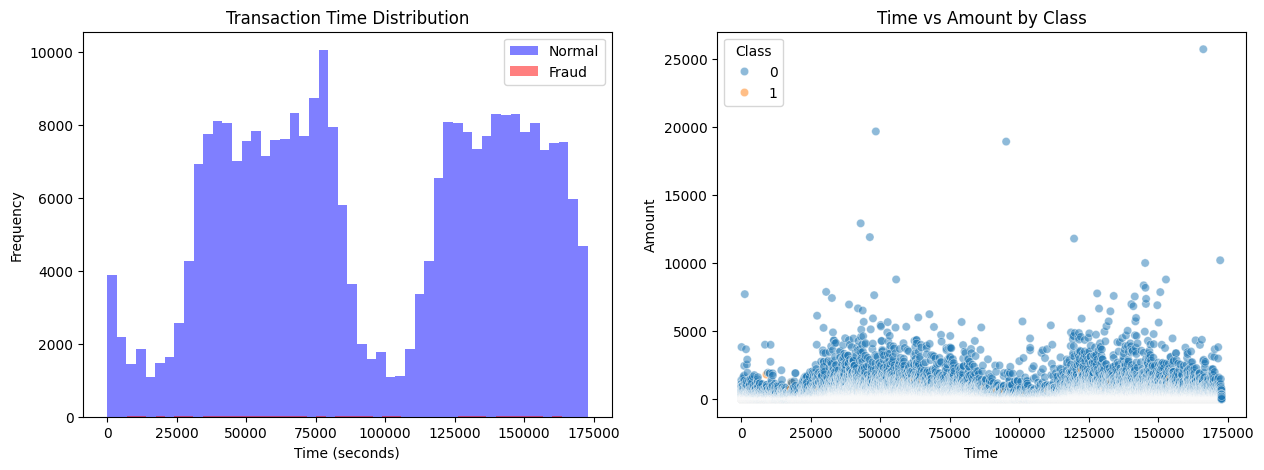

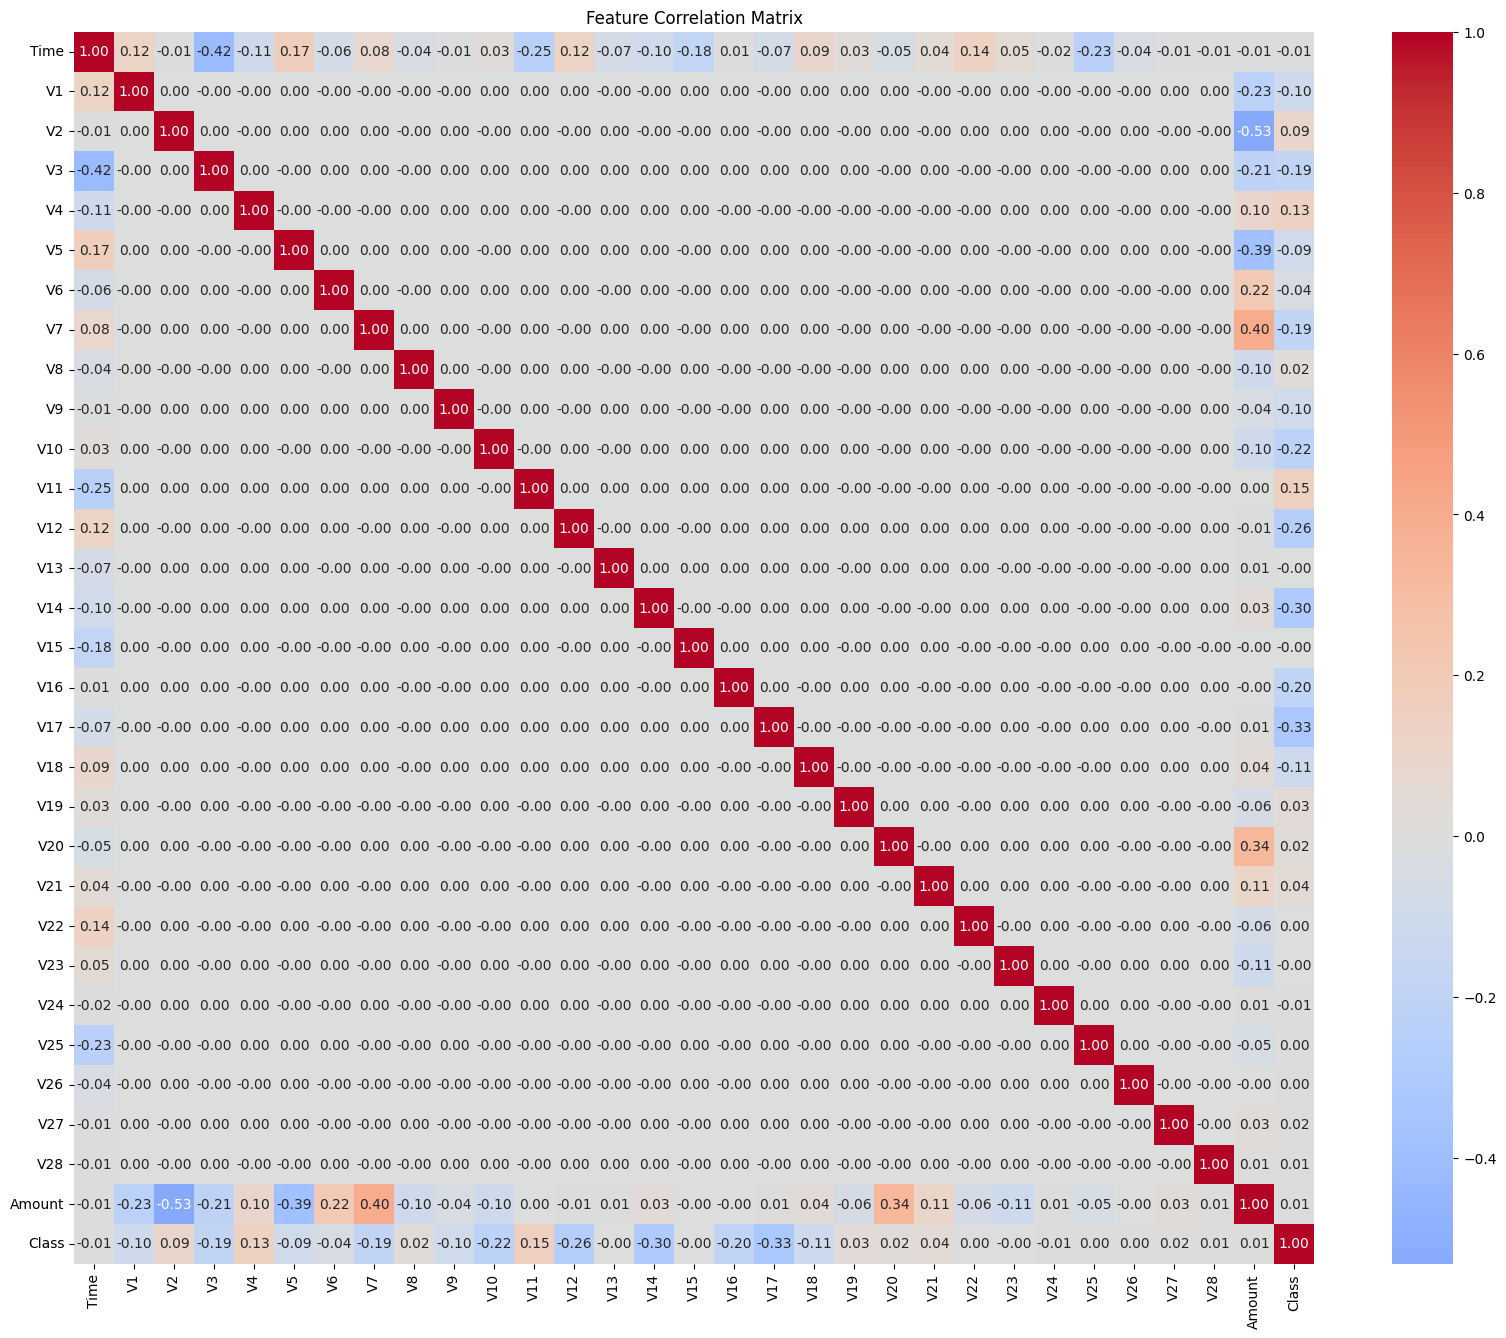


Part A.3: Data Preprocessing

1. Performing feature scaling...

2. Creating new features...

3. Removing original Time and Amount columns...

Preprocessing completed.
Final dataset shape: (284807, 32)

Final features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Scaled_Amount', 'Scaled_Time', 'Amount_Log']

Part A Completed!


In [ ]:
# Part A: EDA and Preprocessing Functions
def explore_data(df):
    """
    Perform initial exploratory data analysis
    """
    print("\nPart A.1: Initial Data Exploration")
    print("="*70)

    # 1. Basic Dataset Information
    print("\n1. Dataset Overview:")
    print(f"Total number of transactions: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

    # 2. Class Distribution
    fraud_count = df['Class'].value_counts()
    print("\n2. Transaction Distribution:")
    print(f"Normal Transactions: {fraud_count[0]}")
    print(f"Fraudulent Transactions: {fraud_count[1]}")
    print(f"Fraud Percentage: {(fraud_count[1]/len(df)*100):.2f}%")

    # 3. Check for missing values
    missing_values = df.isnull().sum()
    print("\n3. Missing Values Check:")
    if missing_values.sum() > 0:
        print(missing_values[missing_values > 0])
    else:
        print("No missing values found in the dataset")

    # 4. Amount Statistics
    print("\n4. Transaction Amount Statistics:")
    print(df.groupby('Class')['Amount'].describe())

    return df

def visualize_patterns(df):
    """
    Create detailed visualizations for EDA
    """
    print("\nPart A.2: Data Visualization")
    print("="*70)

    # 1. Transaction Amount Distribution
    plt.figure(figsize=(15, 5))

    # Normal vs Fraud Amount Distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Transaction Amount by Class')
    plt.yscale('log')

    # Overall Amount Distribution
    plt.subplot(1, 2, 2)
    plt.hist(df['Amount'], bins=50, color='blue', alpha=0.5)
    plt.title('Overall Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.show()

    # 2. Time Distribution
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df[df['Class']==0]['Time'], bins=50, color='blue', alpha=0.5,
             label='Normal')
    plt.hist(df[df['Class']==1]['Time'], bins=50, color='red', alpha=0.5,
             label='Fraud')
    plt.title('Transaction Time Distribution')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', alpha=0.5)
    plt.title('Time vs Amount by Class')
    plt.show()

    # 3. Feature Correlations
    plt.figure(figsize=(20, 16))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()

def preprocess_data(df):
    """
    Perform data preprocessing and feature engineering
    """
    print("\nPart A.3: Data Preprocessing")
    print("="*70)

    # Create a copy of the dataframe
    df_processed = df.copy()

    # 1. Feature Scaling
    print("\n1. Performing feature scaling...")
    scaler = StandardScaler()

    # Scale Amount and Time
    df_processed['Scaled_Amount'] = scaler.fit_transform(df_processed['Amount'].values.reshape(-1, 1))
    df_processed['Scaled_Time'] = scaler.fit_transform(df_processed['Time'].values.reshape(-1, 1))

    # Scale V1-V28
    v_features = [f'V{i}' for i in range(1, 29)]
    df_processed[v_features] = scaler.fit_transform(df_processed[v_features])

    # 2. Feature Engineering
    print("\n2. Creating new features...")
    # Amount-related features
    df_processed['Amount_Log'] = np.log1p(df_processed['Amount'])

    # 3. Remove original Time and Amount columns
    print("\n3. Removing original Time and Amount columns...")
    df_processed.drop(['Time', 'Amount'], axis=1, inplace=True)

    print("\nPreprocessing completed.")
    print(f"Final dataset shape: {df_processed.shape}")
    print("\nFinal features:", df_processed.columns.tolist())

    return df_processed

# Execute Part A
print("Executing Part A: Exploratory Data Analysis and Preprocessing")
print("="*70)

# 1. Explore the data
df = explore_data(df)

# 2. Visualize patterns
visualize_patterns(df)

# 3. Preprocess the data
df_processed = preprocess_data(df)

print("\nPart A Completed!")

# Credit Card Fraud Analysis - Part B: Clustering and Anomaly Detection

Executing Part B: Clustering and Anomaly Detection

Part B.1: Clustering Analysis

1. Determining optimal number of clusters...


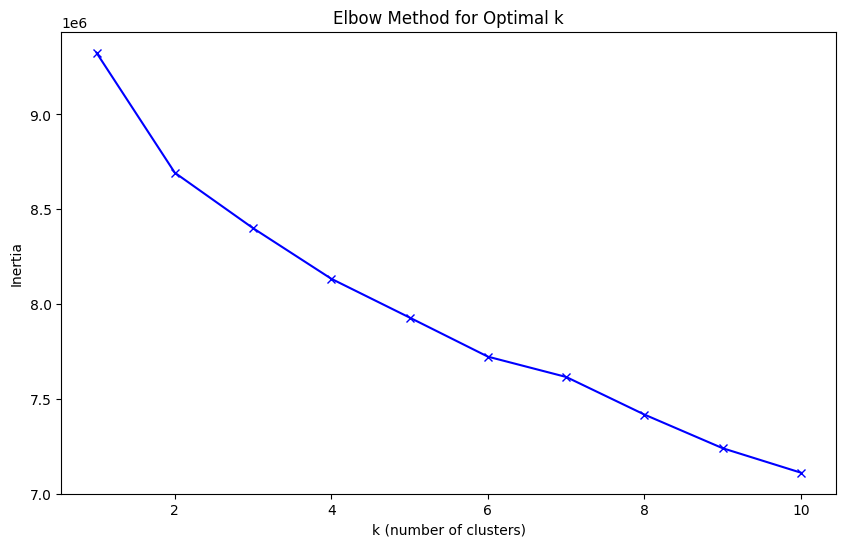


2. Performing K-means clustering with k=3...

3. Cluster Analysis:

Cluster Statistics:
          Class      Scaled_Amount
          count mean          mean
Cluster                           
0          7757 0.00          4.20
1        134684 0.00         -0.33
2        142366 0.00          0.08


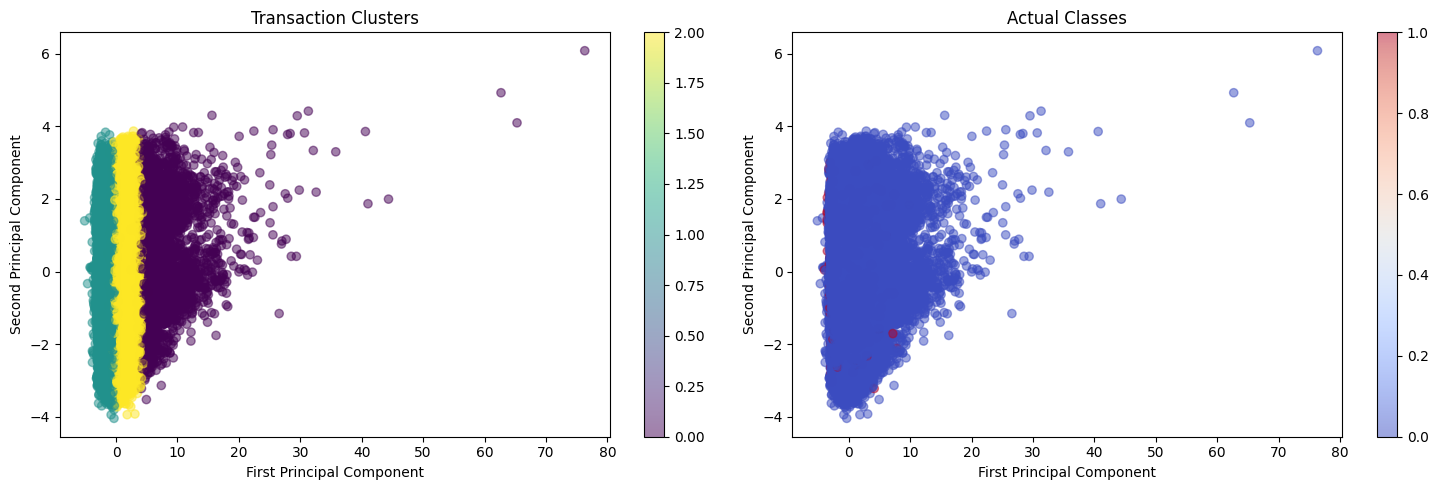


Part B.2: Anomaly Detection

1. Performing Isolation Forest anomaly detection...

2. Anomaly Detection Results:

Confusion Matrix:
[[281733   2582]
 [   225    267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.09      0.54      0.16       492

    accuracy                           0.99    284807
   macro avg       0.55      0.77      0.58    284807
weighted avg       1.00      0.99      0.99    284807



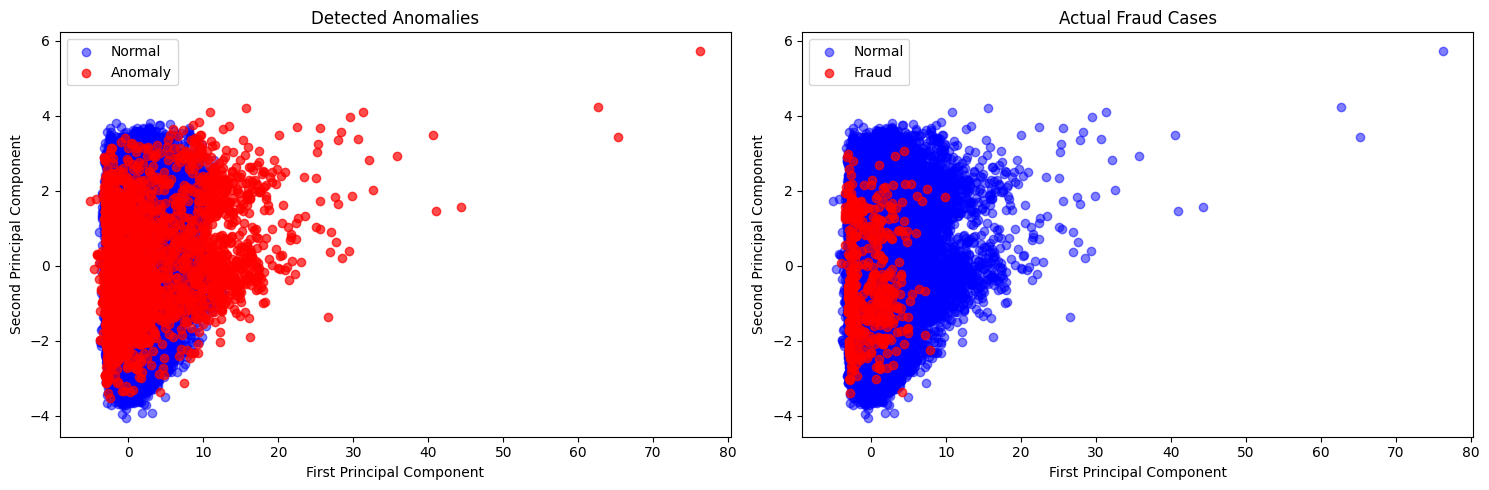


3. Additional Analysis:

Anomaly Distribution across Clusters:
Anomaly       0     1
Cluster              
0          6861   896
1        133491  1193
2        141606   760

Fraud Distribution across Anomalies:
Class         0    1
Anomaly             
0        281733  225
1          2582  267

Part B Completed!


In [ ]:
# Part B: Clustering and Anomaly Detection Functions

def perform_clustering_analysis(df_processed):
    """
    Perform K-means clustering analysis
    """
    print("\nPart B.1: Clustering Analysis")
    print("="*70)

    # Prepare data for clustering (exclude the Class column)
    X_cluster = df_processed.drop('Class', axis=1)

    # 1. Find optimal number of clusters using elbow method
    print("\n1. Determining optimal number of clusters...")
    inertias = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_cluster)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # 2. Perform K-means clustering with optimal k
    optimal_k = 3  # Based on elbow curve
    print(f"\n2. Performing K-means clustering with k={optimal_k}...")

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster)

    # Add cluster labels to dataframe
    df_processed['Cluster'] = cluster_labels

    # 3. Analyze clusters
    print("\n3. Cluster Analysis:")
    cluster_stats = df_processed.groupby('Cluster').agg({
        'Class': ['count', 'mean'],
        'Scaled_Amount': 'mean'
    })
    print("\nCluster Statistics:")
    print(cluster_stats)

    # 4. Visualize clusters
    plt.figure(figsize=(15, 5))

    # Plot using first two principal components
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    # Cluster visualization
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels,
                         cmap='viridis', alpha=0.5)
    plt.title('Transaction Clusters')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    # Class visualization
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['Class'],
                         cmap='coolwarm', alpha=0.5)
    plt.title('Actual Classes')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

    return df_processed

def detect_anomalies(df_processed):
    """
    Perform anomaly detection using Isolation Forest
    """
    print("\nPart B.2: Anomaly Detection")
    print("="*70)

    # Prepare data for anomaly detection
    X_anomaly = df_processed.drop(['Class', 'Cluster'], axis=1)

    # 1. Isolation Forest
    print("\n1. Performing Isolation Forest anomaly detection...")
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_anomaly)

    # Convert predictions to binary (1 for anomaly, 0 for normal)
    df_processed['Anomaly'] = [1 if label == -1 else 0 for label in anomaly_labels]

    # 2. Analyze anomaly detection results
    print("\n2. Anomaly Detection Results:")
    print("\nConfusion Matrix:")
    print(confusion_matrix(df_processed['Class'], df_processed['Anomaly']))
    print("\nClassification Report:")
    print(classification_report(df_processed['Class'], df_processed['Anomaly']))

    # 3. Visualize anomalies
    plt.figure(figsize=(15, 5))

    # PCA for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_anomaly)

    # Plot detected anomalies
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[df_processed['Anomaly']==0, 0],
               X_pca[df_processed['Anomaly']==0, 1],
               c='blue', label='Normal', alpha=0.5)
    plt.scatter(X_pca[df_processed['Anomaly']==1, 0],
               X_pca[df_processed['Anomaly']==1, 1],
               c='red', label='Anomaly', alpha=0.7)
    plt.title('Detected Anomalies')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()

    # Compare with actual fraud cases
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[df_processed['Class']==0, 0],
               X_pca[df_processed['Class']==0, 1],
               c='blue', label='Normal', alpha=0.5)
    plt.scatter(X_pca[df_processed['Class']==1, 0],
               X_pca[df_processed['Class']==1, 1],
               c='red', label='Fraud', alpha=0.7)
    plt.title('Actual Fraud Cases')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 4. Additional Analysis
    print("\n3. Additional Analysis:")
    print("\nAnomaly Distribution across Clusters:")
    print(pd.crosstab(df_processed['Cluster'], df_processed['Anomaly']))

    print("\nFraud Distribution across Anomalies:")
    print(pd.crosstab(df_processed['Anomaly'], df_processed['Class']))

    return df_processed

# Execute Part B
print("Executing Part B: Clustering and Anomaly Detection")
print("="*70)

# 1. Perform clustering analysis
df_processed = perform_clustering_analysis(df_processed)

# 2. Perform anomaly detection
df_processed = detect_anomalies(df_processed)

print("\nPart B Completed!")

# Credit Card Fraud Analysis - Part C: Machine Learning Models

Executing Part C: Machine Learning Models

Part C.1: Data Preparation for Modeling

Data split summary:
Training set shape: (227845, 31)
Testing set shape: (56962, 31)

Class distribution in training set:
0   1.00
1   0.00
Name: Class, dtype: float64

Part C.2: Model Training and Evaluation

Training Random Forest (with SMOTE)...

Random Forest (with SMOTE) Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



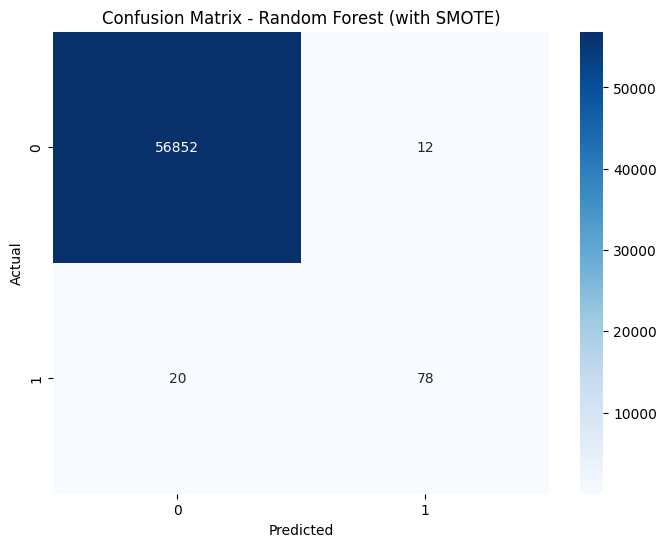

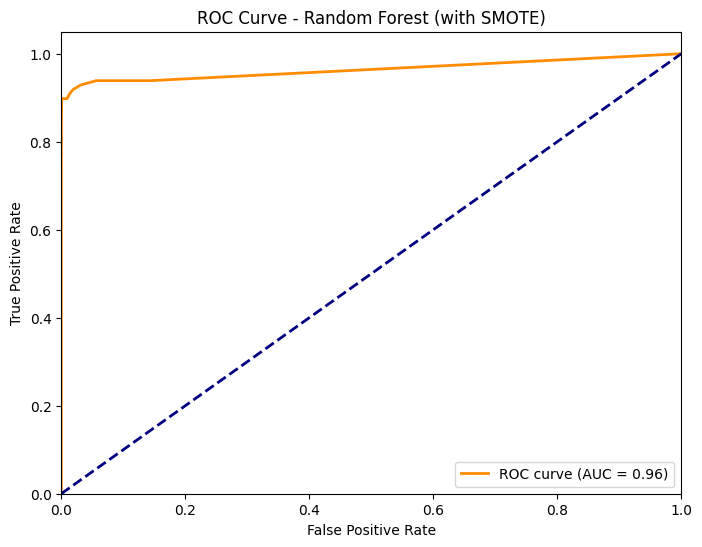


Training XGBoost...

XGBoost Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



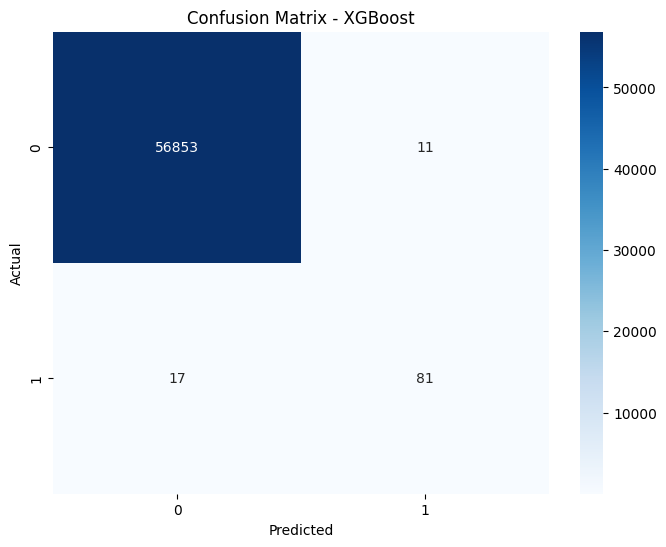

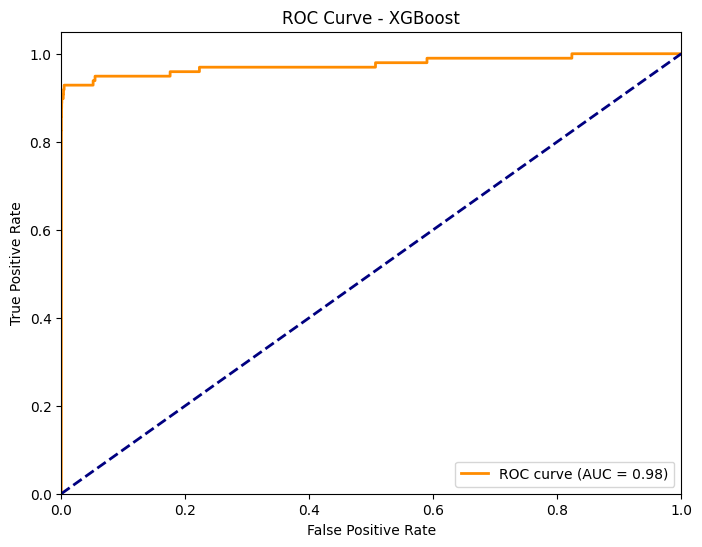


Part C.3: Feature Importance Analysis


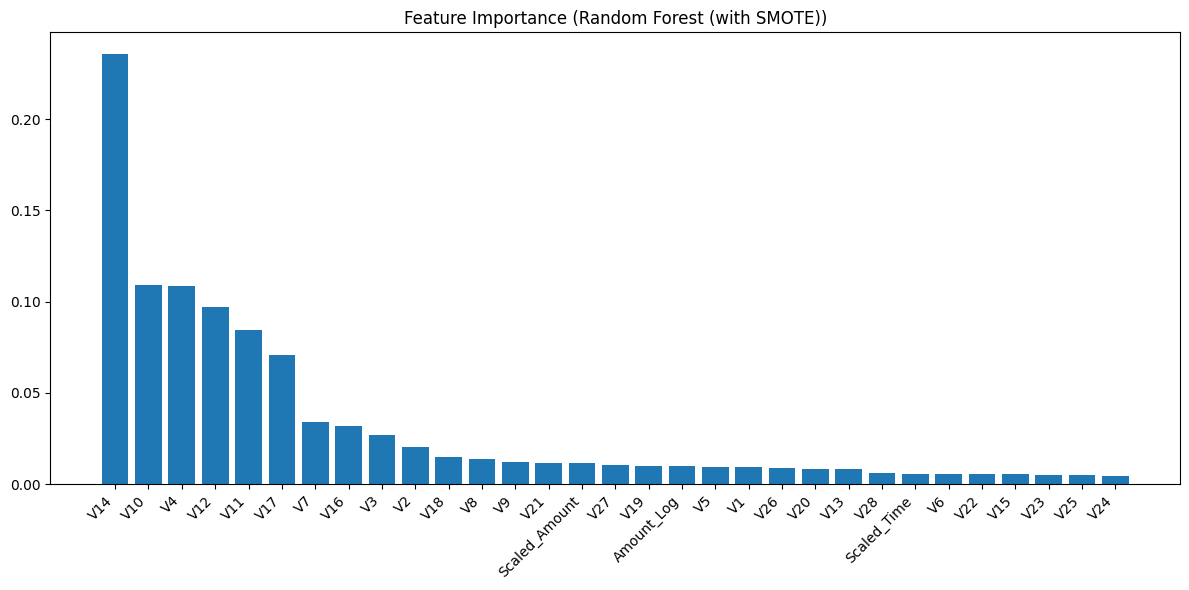


Top 10 Important Features (Random Forest (with SMOTE)):
1. V14 (0.235875)
2. V10 (0.109267)
3. V4 (0.108418)
4. V12 (0.097029)
5. V11 (0.084419)
6. V17 (0.070762)
7. V7 (0.033797)
8. V16 (0.031792)
9. V3 (0.027061)
10. V2 (0.020468)


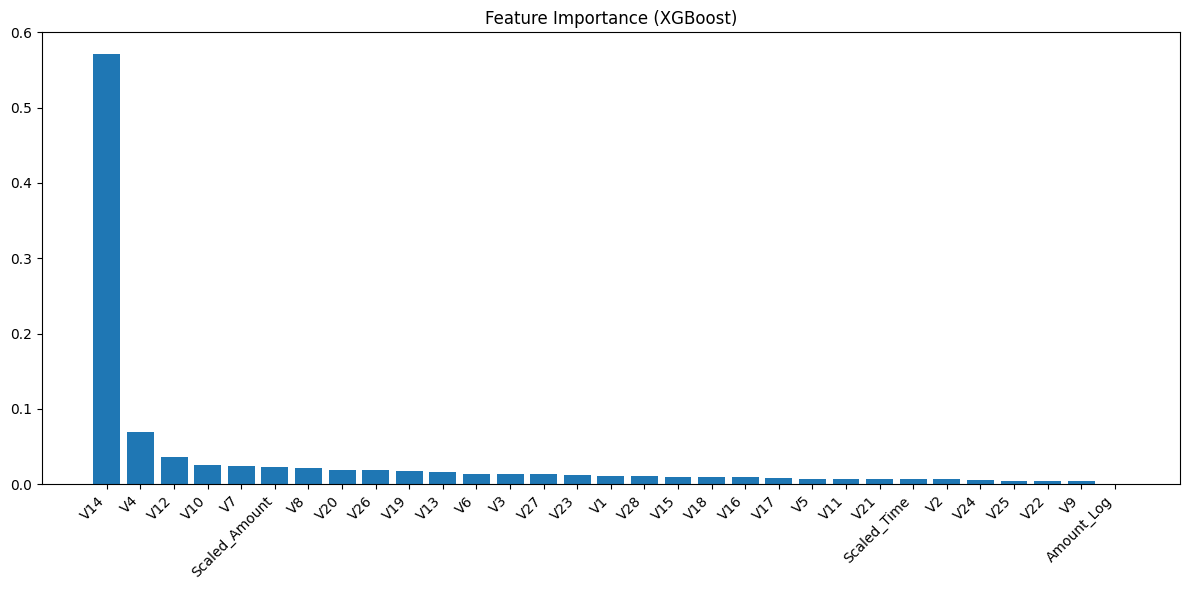


Top 10 Important Features (XGBoost):
1. V14 (0.571583)
2. V4 (0.069286)
3. V12 (0.035451)
4. V10 (0.025795)
5. V7 (0.023970)
6. Scaled_Amount (0.022040)
7. V8 (0.021698)
8. V20 (0.018527)
9. V26 (0.018307)
10. V19 (0.016726)

Part C.4: Prediction Analysis

Cases where models disagree:
Number of cases with model disagreement: 12

Sample of disagreement cases:
        Actual  Random Forest (with SMOTE)_pred  XGBoost_pred
93527        0                                1             0
197403       0                                1             0
70589        1                                0             1
14170        1                                1             0
8972         1                                0             1

Part C Completed!


In [ ]:
# Part C: Machine Learning Models

# Import additional required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import xgboost as xgb

def prepare_data_for_modeling(df_processed):
    """
    Prepare the data for modeling
    """
    print("\nPart C.1: Data Preparation for Modeling")
    print("="*70)

    # Remove the cluster and anomaly columns (keeping only original and engineered features)
    modeling_columns = [col for col in df_processed.columns
                       if col not in ['Class', 'Cluster', 'Anomaly']]

    X = df_processed[modeling_columns]
    y = df_processed['Class']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\nData split summary:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
    print("\nClass distribution in training set:")
    print(pd.Series(y_train).value_counts(normalize=True))

    return X_train, X_test, y_train, y_test

def train_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple models
    """
    print("\nPart C.2: Model Training and Evaluation")
    print("="*70)

    # 1. Create SMOTE pipeline for handling imbalanced data
    smote_pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # 2. Initialize models
    models = {
        'Random Forest (with SMOTE)': smote_pipeline,
        'XGBoost': xgb.XGBClassifier(
            scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
            random_state=42
        )
    }

    # 3. Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Store results
        results[name] = {
            'predictions': y_pred,
            'model': model
        }

        # Print performance metrics
        print(f"\n{name} Results:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Plot ROC curve
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

    return results

def analyze_feature_importance(models, X_train):
    """
    Analyze and visualize feature importance
    """
    print("\nPart C.3: Feature Importance Analysis")
    print("="*70)

    for name, model_dict in models.items():
        if name == 'Random Forest (with SMOTE)':
            model = model_dict['model'].named_steps['classifier']
        else:
            model = model_dict['model']

        # Get feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]

            # Plot feature importance
            plt.figure(figsize=(12, 6))
            plt.title(f'Feature Importance ({name})')
            plt.bar(range(X_train.shape[1]),
                   importances[indices])
            plt.xticks(range(X_train.shape[1]),
                      X_train.columns[indices], rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Print top 10 important features
            print(f"\nTop 10 Important Features ({name}):")
            for f in range(10):
                print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]],
                                     importances[indices[f]]))

def evaluate_predictions(results, X_test, y_test):
    """
    Perform additional prediction analysis
    """
    print("\nPart C.4: Prediction Analysis")
    print("="*70)

    # Compare predictions from different models
    predictions_df = pd.DataFrame({
        'Actual': y_test
    })

    for name, result in results.items():
        predictions_df[f'{name}_pred'] = result['predictions']

    # Analyze cases where models disagree
    print("\nCases where models disagree:")
    disagreements = predictions_df[
        predictions_df[[col for col in predictions_df.columns if '_pred' in col]].nunique(axis=1) > 1
    ]
    print(f"Number of cases with model disagreement: {len(disagreements)}")

    if len(disagreements) > 0:
        print("\nSample of disagreement cases:")
        print(disagreements.head())

    return predictions_df

# Execute Part C
print("Executing Part C: Machine Learning Models")
print("="*70)

# 1. Prepare data
X_train, X_test, y_train, y_test = prepare_data_for_modeling(df_processed)

# 2. Train models
model_results = train_models(X_train, X_test, y_train, y_test)

# 3. Analyze feature importance
analyze_feature_importance(model_results, X_train)

# 4. Evaluate predictions
predictions_df = evaluate_predictions(model_results, X_test, y_test)

print("\nPart C Completed!")